In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb
from Polynome2p1 import *
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


In [2]:
fonctions_test = FT.fonctions("Sans Arg","Classic")

In [3]:
def test_approx(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,501)
    px, param_interpol = approxh(x,p,f,h,epsilon,s,ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx

### Variation de p

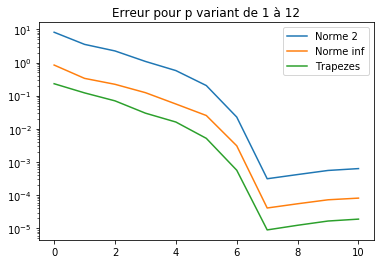

In [4]:
h = 1
epsilon=0.001
p = np.arange(1,12,1)
Prod_poly_10_7_h = FT.Prod_poly_10_7_h
name = str(Prod_poly_10_7_h).split(' ')[1]

Err = np.zeros((3,len(p)))

for i in range(len(p)):
    px,fx = test_approx(p[i],Prod_poly_10_7_h,h,epsilon,0,0)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = trapezes(px-fx)
    
plt.semilogy(Err[0,:],label="Norme 2")
plt.semilogy(Err[1,:],label="Norme inf")
plt.semilogy(Err[2,:],label="Trapezes")
plt.legend()
plt.title("Erreur pour p variant de 1 à 12")
plt.savefig("./Images/EtudesParamOpe/Parametres/variationP/eps/"+name+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
plt.savefig("./Images/EtudesParamOpe/Parametres/variationP/png/"+name+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
plt.show()

### Variation de h

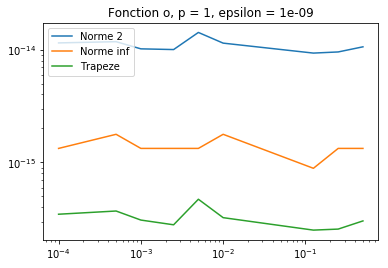

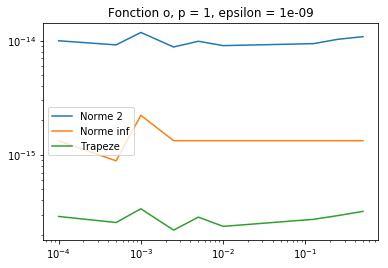

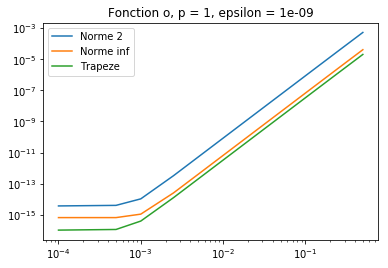

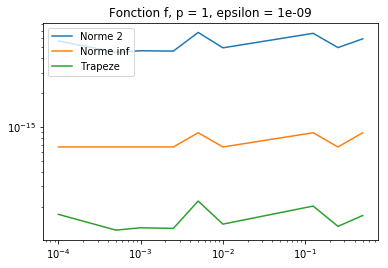

In [5]:
h = [1/2,1/4,1/8,1/100,1/200,1/400,1/1000,1/2000,1/10000]
p = 1
epsilon = 1e-9
Err = np.zeros((3,len(h)))

for f in fonctions_test : 
    for i in range(len(h)):
        px,fx = test_approx(p,f,h[i],epsilon,0)
        Err[0,i] = npl.norm(px-fx)
        Err[1,i] = npl.norm(px-fx,np.inf)
        Err[2,i] = trapezes(px-fx)

    plt.loglog(h,Err[0,:],label="Norme 2")
    plt.loglog(h,Err[1,:],label="Norme inf")
    plt.loglog(h,Err[2,:],label="Trapeze")
    name = str(f).split(' ')[1]
    plt.title("Fonction "+name[1]+", p = "+str(p)+", epsilon = "+str(epsilon))
    plt.savefig("./Images/EtudesParamOpe/Parametres/variationH/eps/"+name+", p = "+str(p)+", epsilon = "+str(epsilon)+".eps", format='eps')
    plt.savefig("./Images/EtudesParamOpe/Parametres/variationH/png/"+name+", p = "+str(p)+", epsilon = "+str(epsilon)+".png", format='png')
    plt.legend()
    plt.show()
    

Pb sur le dernier : stagne à 10-2
Origine du pb possible : nb de points insuffisants et/ou epsilon trop grand (si h grand la fonction trop proche de 0 => valeur cachée dans epsilon

## Variation de epsilon

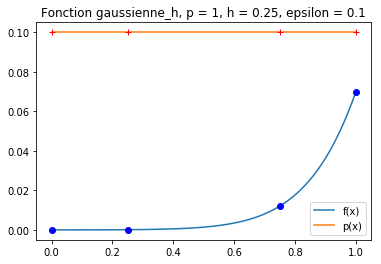

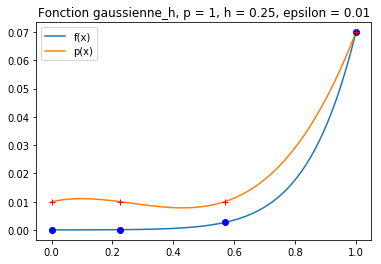

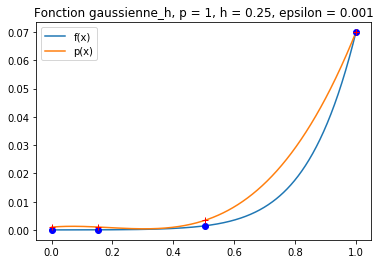

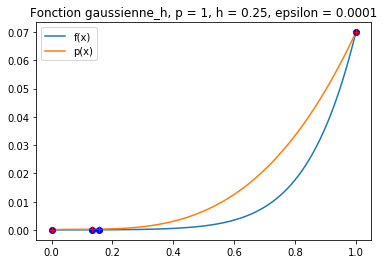

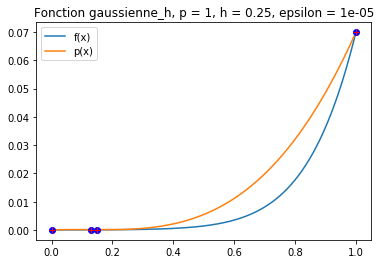

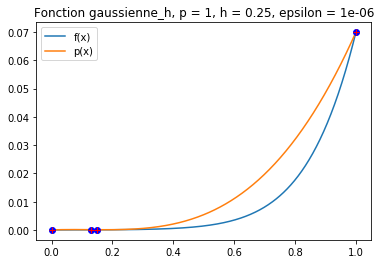

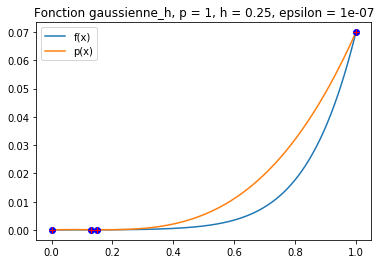

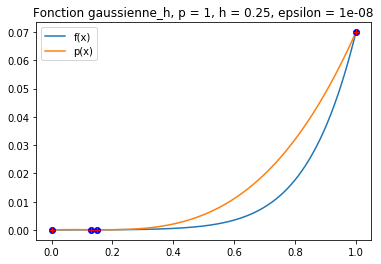

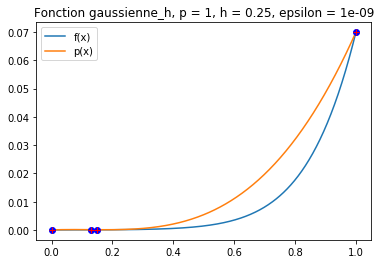

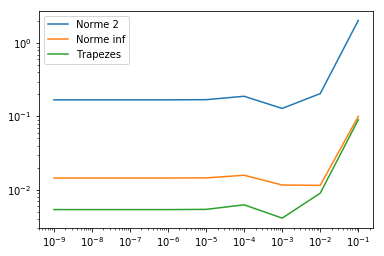

In [6]:
h = 1/4 
p = 1
epsilon = 1/(10**np.arange(1,10,1))
Err = np.zeros((3,len(epsilon)))
gaussienne_h = FT.gaussienne_h
name = str(gaussienne_h).split(' ')[1]

for i in range(len(epsilon)):
    px,fx = test_approx(p,gaussienne_h,h,epsilon[i],"VariationEps",1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = trapezes(px-fx)

plt.loglog(epsilon,Err[0,:],label="Norme 2")
plt.loglog(epsilon,Err[1,:],label="Norme inf")
plt.loglog(epsilon,Err[2,:],label="Trapezes")
plt.legend()
plt.savefig("./Images/EtudesParamOpe/Parametres/variationEps/eps/"+name+", p = "+str(p)+", h = "+str(h)+".eps", format='eps')
plt.savefig("./Images/EtudesParamOpe/Parametres/variationEps/png/"+name+", p = "+str(p)+", h = "+str(h)+".png", format='png')
plt.show()

## Effets de Gibbs

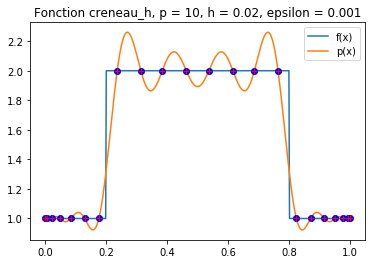

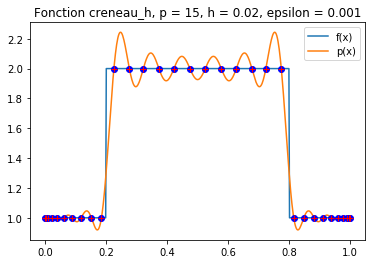

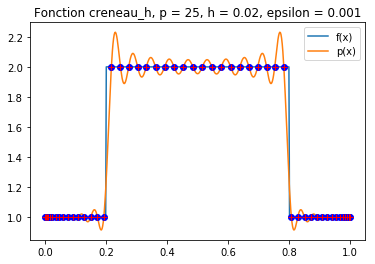

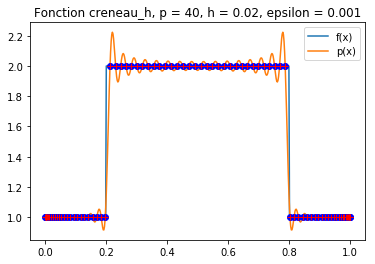

In [7]:
p =10
h  = 0.02
epsilon = 1e-3
creneau = FT.creneau_h

for p in [10,15,25,40]:
    px,fx = test_approx(p,creneau,h,epsilon,"effetGibbs",1)